<a href="https://colab.research.google.com/github/Geethika1205/Generative_AI_2025/blob/main/gen%20ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving image1.jpg to image1.jpg


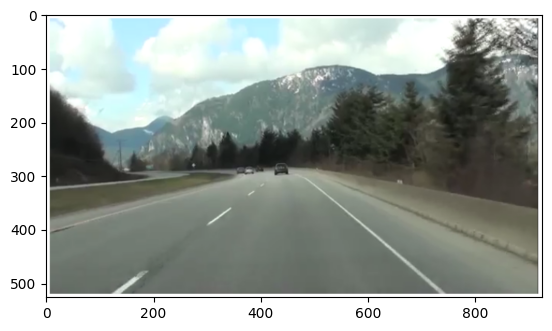

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = list(uploaded.keys())[0]
img = mpimg.imread("/content/image1.jpg")
plt.imshow(img)
plt.axis('on')
plt.show()


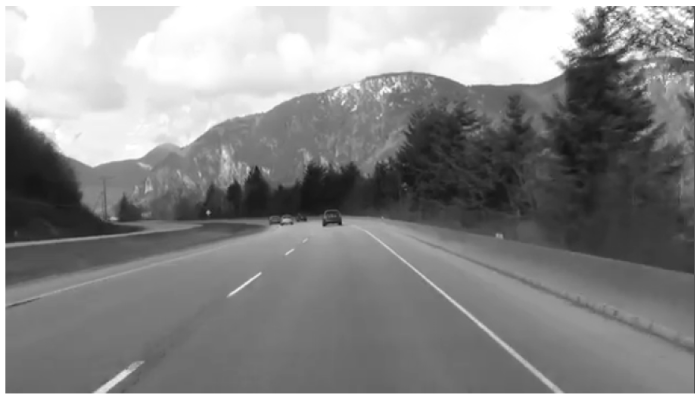

In [3]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = list(uploaded.keys())[0]  # Get uploaded file name
img = cv2.imread(image_path)  # Read image

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize image to a manageable size (e.g., width=500 pixels while keeping aspect ratio)
height, width = gray_img.shape
new_width = 700
new_height = int((new_width / width) * height)
resized_gray = cv2.resize(gray_img, (new_width, new_height))

# Display the resized grayscale image
cv2_imshow(resized_gray)


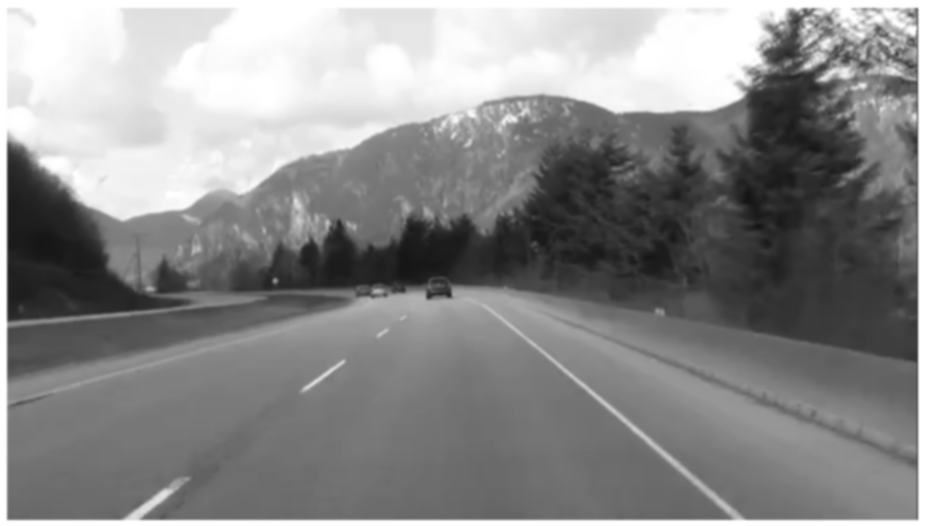

In [4]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = list(uploaded.keys())[0]  # Get uploaded file name
img = cv2.imread(image_path)  # Read image

# Convert to grayscale (optional, depends on your need)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)  # (kernel_size = 5x5), sigmaX = 0

# Display the blurred image
cv2_imshow(blurred_img)


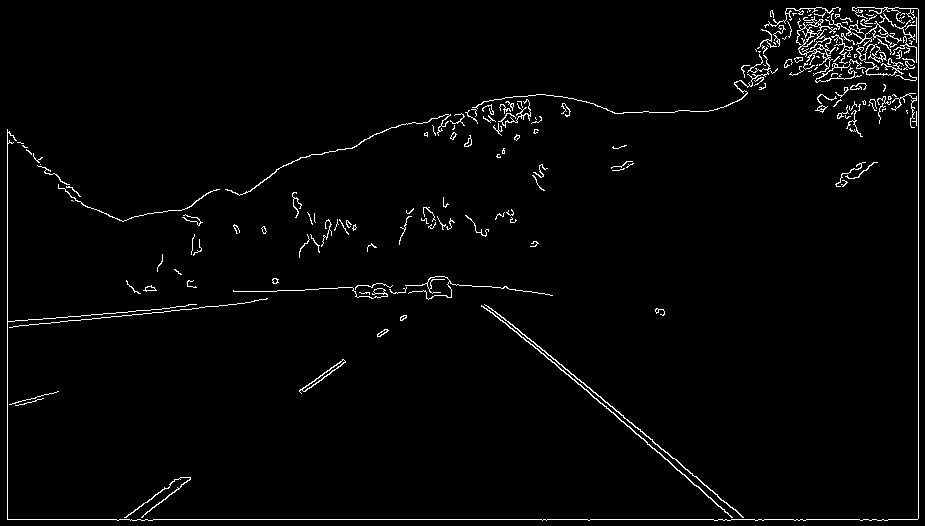

In [5]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = list(uploaded.keys())[0]  # Get uploaded file name
img = cv2.imread("/content/image1.jpg")  # Read image

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny Edge Detection
edges = cv2.Canny(gray_img, threshold1=100, threshold2=200)

# Display the edge-detected image
cv2_imshow(edges)


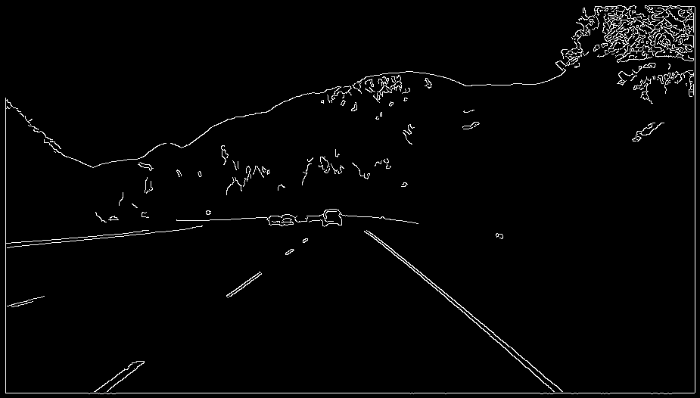

In [6]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = list(uploaded.keys())[0]  # Get uploaded file name
img = cv2.imread("/content/image1.jpg")  # Read image

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny Edge Detection
edges = cv2.Canny(gray_img, threshold1=100, threshold2=200)

# Resize the edge-detected image to a manageable size
height, width = edges.shape
new_width = 700
  # Set desired width
new_height = int((new_width / width) * height)  # Keep aspect ratio
resized_edges = cv2.resize(edges, (new_width, new_height))

# Display the resized edge-detected image
cv2_imshow(resized_edges)


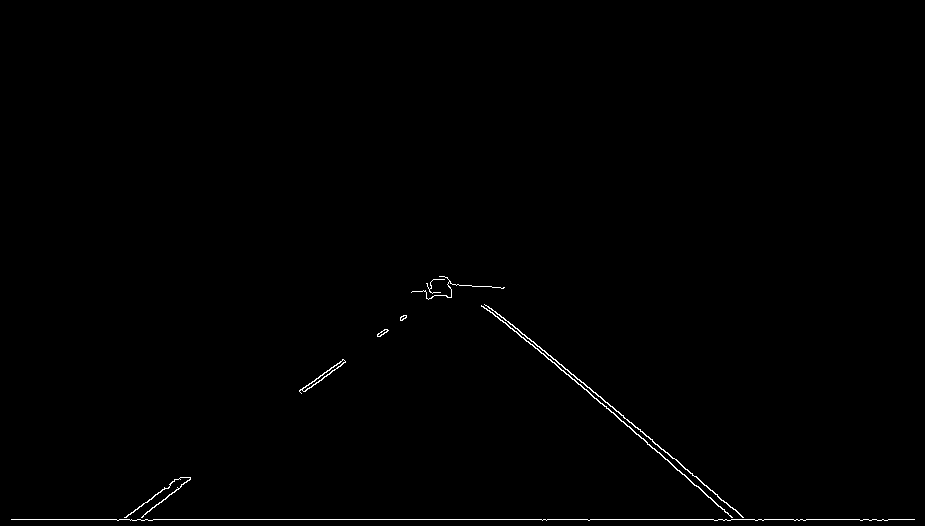

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image_path = "/mnt/data/Screenshot 2025-02-07 181324.png"  # Your uploaded image
img = cv2.imread("/content/image1.jpg")

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny Edge Detection
edges = cv2.Canny(gray_img, 100, 200)

# Get image dimensions
height, width = edges.shape

# Define a triangular region focusing on the road
roi_vertices = np.array([[
    (0, height),          # Bottom-left corner
    (width // 2, height // 2),  # Middle top
    (width, height)       # Bottom-right corner
]], dtype=np.int32)

# Create a black mask
mask = np.zeros_like(edges)

# Fill the ROI with white
cv2.fillPoly(mask, roi_vertices, 255)

# Apply the mask to extract the ROI
roi_edges = cv2.bitwise_and(edges, mask)

# Display the extracted ROI
cv2_imshow(roi_edges)


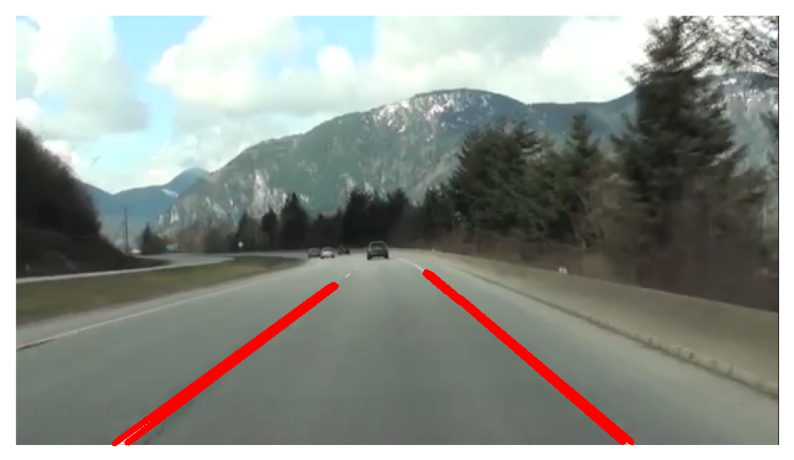

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/image1.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Define region of interest (ROI)
def region_of_interest(img):
    height, width = img.shape
    mask = np.zeros_like(img)

    # Define a polygon to mask everything except the lane area
    polygon = np.array([
        [(50, height), (width // 2 - 150, height // 2 + 50), (width // 2 + 150, height // 2 + 50), (width - 50, height)]
    ], np.int32)

    cv2.fillPoly(mask, polygon, 255)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

masked_edges = region_of_interest(edges)

# Apply Hough Line Transform
lines = cv2.HoughLinesP(masked_edges, 1, np.pi / 180, threshold=20, minLineLength=20, maxLineGap=200)

# Separate left and right lane lines
def separate_lines(lines, width):
    left_lines = []
    right_lines = []
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
            if slope < -0.2:
                left_lines.append(line[0])
            elif slope > 0.2:
                right_lines.append(line[0])
    return left_lines, right_lines

left_lines, right_lines = separate_lines(lines, image.shape[1])

# Draw the detected lane lines on the image
for line in left_lines + right_lines:
    x1, y1, x2, y2 = line
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 5)

# Convert BGR image to RGB for displaying in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the result
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


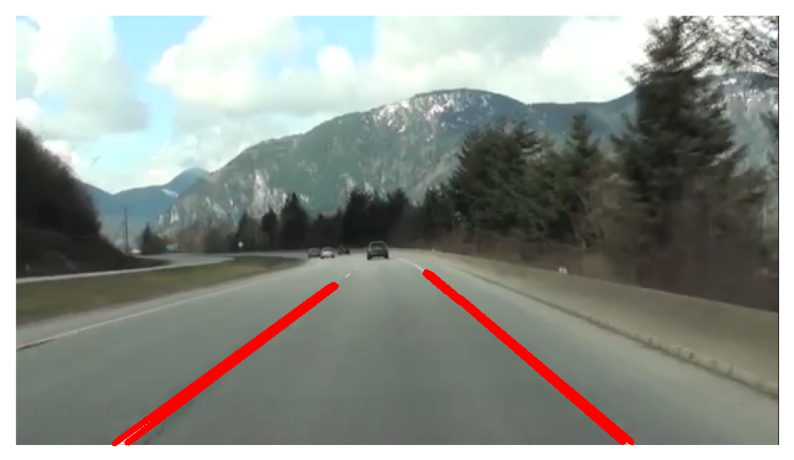

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/image1.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Define region of interest (ROI)
def region_of_interest(img):
    height, width = img.shape
    mask = np.zeros_like(img)

    # Define a polygon to mask everything except the lane area
    polygon = np.array([
        [(50, height), (width // 2 - 150, height // 2 + 50), (width // 2 + 150, height // 2 + 50), (width - 50, height)]
    ], np.int32)

    cv2.fillPoly(mask, polygon, 255)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

masked_edges = region_of_interest(edges)

# Apply Hough Line Transform
lines = cv2.HoughLinesP(masked_edges, 1, np.pi / 180, threshold=20, minLineLength=20, maxLineGap=200)

# Separate left and right lane lines
def separate_lines(lines, width):
    left_lines = []
    right_lines = []
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
            if slope < -0.2:
                left_lines.append(line[0])
            elif slope > 0.2:
                right_lines.append(line[0])
    return left_lines, right_lines

left_lines, right_lines = separate_lines(lines, image.shape[1])

# Draw the detected lane lines on the image
for line in left_lines + right_lines:
    x1, y1, x2, y2 = line
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 5)

# Convert BGR image to RGB for displaying in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the result
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


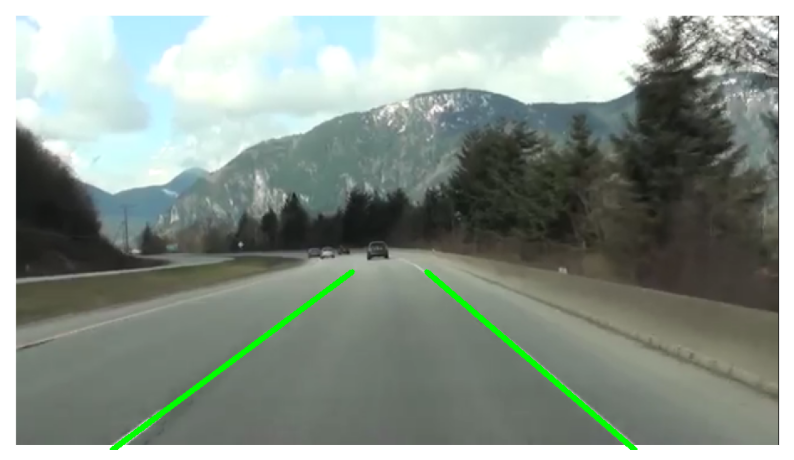

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/image1.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Define region of interest (ROI)
def region_of_interest(img):
    height, width = img.shape
    mask = np.zeros_like(img)

    polygon = np.array([
        [(50, height), (width // 2 - 150, height // 2 + 50), (width // 2 + 150, height // 2 + 50), (width - 50, height)]
    ], np.int32)

    cv2.fillPoly(mask, polygon, 255)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

masked_edges = region_of_interest(edges)

# Apply Hough Line Transform
lines = cv2.HoughLinesP(masked_edges, 1, np.pi / 180, threshold=20, minLineLength=20, maxLineGap=200)

# Function to average and extrapolate lane lines
def extrapolate_lines(image, lines):
    left_lines, right_lines = [], []
    left_weights, right_weights = [], []

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
            intercept = y1 - slope * x1
            length = np.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)

            if slope < -0.2:
                left_lines.append((slope, intercept))
                left_weights.append(length)
            elif slope > 0.2:
                right_lines.append((slope, intercept))
                right_weights.append(length)

    def average_lane(lines, weights, y_min, y_max):
        if len(lines) > 0:
            avg_slope = np.dot(weights, [l[0] for l in lines]) / np.sum(weights)
            avg_intercept = np.dot(weights, [l[1] for l in lines]) / np.sum(weights)
            x_min = int((y_min - avg_intercept) / avg_slope)
            x_max = int((y_max - avg_intercept) / avg_slope)
            return [(x_min, y_min, x_max, y_max)]
        return []

    height, _ = image.shape[:2]
    y_min, y_max = height // 2 + 50, height  # Define y-range of lane lines
    left_lane = average_lane(left_lines, left_weights, y_min, y_max)
    right_lane = average_lane(right_lines, right_weights, y_min, y_max)

    return left_lane + right_lane

# Extrapolate lane lines
extrapolated_lines = extrapolate_lines(image, lines)

# Draw the detected lane lines
for line in extrapolated_lines:
    x1, y1, x2, y2 = line
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 5)  # Green color for lane lines

# Convert BGR image to RGB for displaying in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the result
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


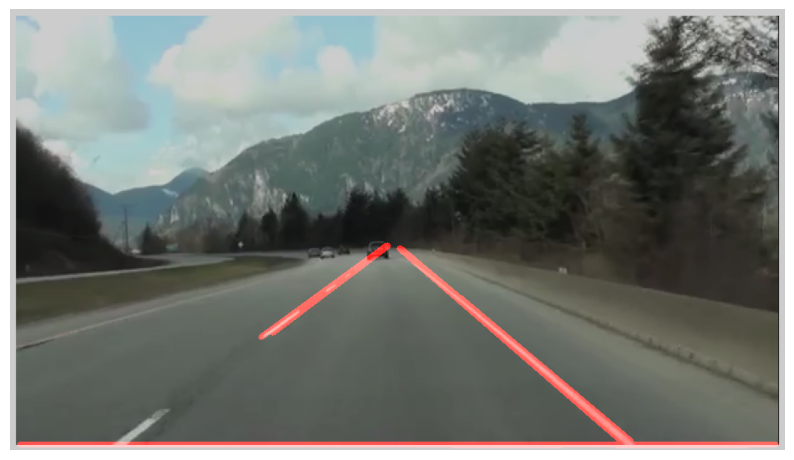

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/image1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Apply Gaussian Blur
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection
edges = cv2.Canny(blur, 50, 150)

# Define a region of interest (ROI)
height, width = edges.shape
mask = np.zeros_like(edges)
polygon = np.array([[
    (0, height), (width // 2, height // 2), (width, height)
]], np.int32)
cv2.fillPoly(mask, polygon, 255)
masked_edges = cv2.bitwise_and(edges, mask)

# Use Hough Transform to detect lines
lines = cv2.HoughLinesP(masked_edges, 1, np.pi / 180, 50, minLineLength=100, maxLineGap=50)

# Draw detected lines on the original image
line_image = np.zeros_like(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

# Combine original image with detected lines
final_image = cv2.addWeighted(image, 0.8, line_image, 1, 0)

# Display the result
plt.figure(figsize=(10, 6))
plt.imshow(final_image)
plt.axis("off")
plt.show()


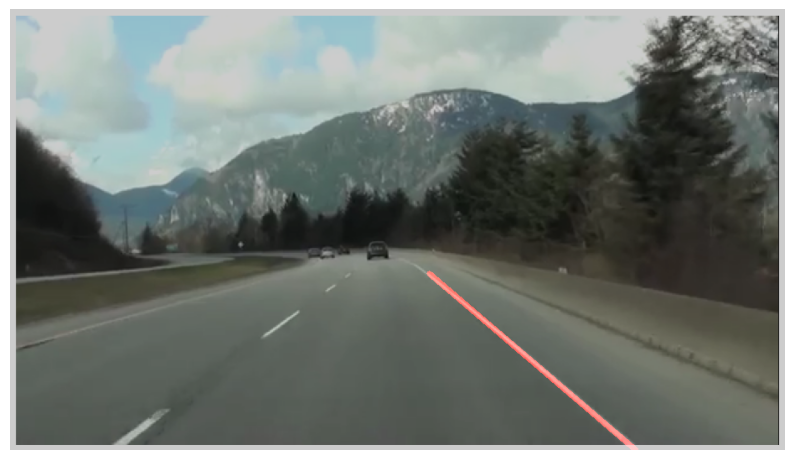

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_canny(image):
    """Convert image to grayscale, apply Gaussian Blur and Canny Edge Detection."""
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)
    return edges

def region_of_interest(edges):
    """Define a region of interest to filter unnecessary edges."""
    height, width = edges.shape
    mask = np.zeros_like(edges)
    polygon = np.array([[
        (int(width * 0.1), height),
        (int(width * 0.45), int(height * 0.6)),
        (int(width * 0.55), int(height * 0.6)),
        (int(width * 0.9), height)
    ]], np.int32)
    cv2.fillPoly(mask, polygon, 255)
    masked_edges = cv2.bitwise_and(edges, mask)
    return masked_edges

def detect_lines(image):
    """Detect lane lines using Hough Transform."""
    edges = apply_canny(image)
    roi_edges = region_of_interest(edges)

    lines = cv2.HoughLinesP(roi_edges, 1, np.pi / 180, 50, minLineLength=100, maxLineGap=50)
    return lines

def draw_lines(image, lines):
    """Draw lane lines on the original image."""
    line_image = np.zeros_like(image)
    if lines is not None:
        left_lines = []
        right_lines = []
        for line in lines:
            x1, y1, x2, y2 = line[0]
            slope = (y2 - y1) / (x2 - x1)
            if slope < -0.4:  # Left lane
                left_lines.append((x1, y1, x2, y2))
            elif slope > 0.4:  # Right lane
                right_lines.append((x1, y1, x2, y2))

        def average_line(lines):
            if len(lines) == 0:
                return None
            x_coords = []
            y_coords = []
            for x1, y1, x2, y2 in lines:
                x_coords.extend([x1, x2])
                y_coords.extend([y1, y2])
            poly = np.polyfit(x_coords, y_coords, 1)
            y1 = image.shape[0]  # Bottom of the image
            y2 = int(y1 * 0.6)  # Slightly above the center
            x1 = int((y1 - poly[1]) / poly[0])
            x2 = int((y2 - poly[1]) / poly[0])
            return x1, y1, x2, y2

        left_lane = average_line(left_lines)
        right_lane = average_line(right_lines)

        if left_lane:
            cv2.line(line_image, (left_lane[0], left_lane[1]), (left_lane[2], left_lane[3]), (255, 0, 0), 5)
        if right_lane:
            cv2.line(line_image, (right_lane[0], right_lane[1]), (right_lane[2], right_lane[3]), (255, 0, 0), 5)

    return cv2.addWeighted(image, 0.8, line_image, 1, 0)

# Load the image
image_path = "/content/image1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process and display the result
lines = detect_lines(image)
result = draw_lines(image, lines)

plt.figure(figsize=(10, 6))
plt.imshow(result)
plt.axis("off")
plt.show()


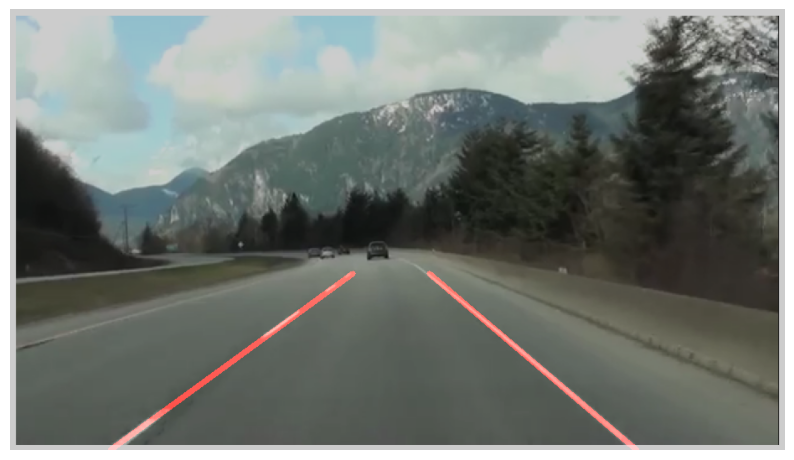

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_canny(image):
    """Convert image to grayscale, apply Gaussian Blur and Canny Edge Detection."""
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 40, 120)  # Lower thresholds to detect faint lines
    return edges

def region_of_interest(edges):
    """Define a region of interest to filter unnecessary edges."""
    height, width = edges.shape
    mask = np.zeros_like(edges)
    polygon = np.array([[
        (int(width * 0.1), height),
        (int(width * 0.45), int(height * 0.6)),
        (int(width * 0.55), int(height * 0.6)),
        (int(width * 0.9), height)
    ]], np.int32)
    cv2.fillPoly(mask, polygon, 255)
    return cv2.bitwise_and(edges, mask)

def detect_lines(image):
    """Detect lane lines using improved Hough Transform."""
    edges = apply_canny(image)
    roi_edges = region_of_interest(edges)

    # Increase maxLineGap to connect dashed lines better
    lines = cv2.HoughLinesP(roi_edges, 1, np.pi / 180, 30, minLineLength=50, maxLineGap=200)
    return lines

def draw_lines(image, lines):
    """Draw lane lines on the original image."""
    line_image = np.zeros_like(image)
    if lines is not None:
        left_lines = []
        right_lines = []
        for line in lines:
            x1, y1, x2, y2 = line[0]
            slope = (y2 - y1) / (x2 - x1 + 1e-6)  # Avoid division by zero
            if slope < -0.3:  # Left lane
                left_lines.append((x1, y1, x2, y2))
            elif slope > 0.3:  # Right lane
                right_lines.append((x1, y1, x2, y2))

        def extrapolate_line(lines):
            if len(lines) == 0:
                return None
            x_coords = []
            y_coords = []
            for x1, y1, x2, y2 in lines:
                x_coords.extend([x1, x2])
                y_coords.extend([y1, y2])
            poly = np.polyfit(x_coords, y_coords, 1)
            y1 = image.shape[0]  # Bottom of the image
            y2 = int(y1 * 0.6)  # Slightly above center
            x1 = int((y1 - poly[1]) / poly[0])
            x2 = int((y2 - poly[1]) / poly[0])
            return x1, y1, x2, y2

        left_lane = extrapolate_line(left_lines)
        right_lane = extrapolate_line(right_lines)

        if left_lane:
            cv2.line(line_image, (left_lane[0], left_lane[1]), (left_lane[2], left_lane[3]), (255, 0, 0), 5)
        if right_lane:
            cv2.line(line_image, (right_lane[0], right_lane[1]), (right_lane[2], right_lane[3]), (255, 0, 0), 5)

    return cv2.addWeighted(image, 0.8, line_image, 1, 0)

# Load the image
image_path = "/content/image1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process and display the result
lines = detect_lines(image)
result = draw_lines(image, lines)

plt.figure(figsize=(10, 6))
plt.imshow(result)
plt.axis("off")
plt.show()


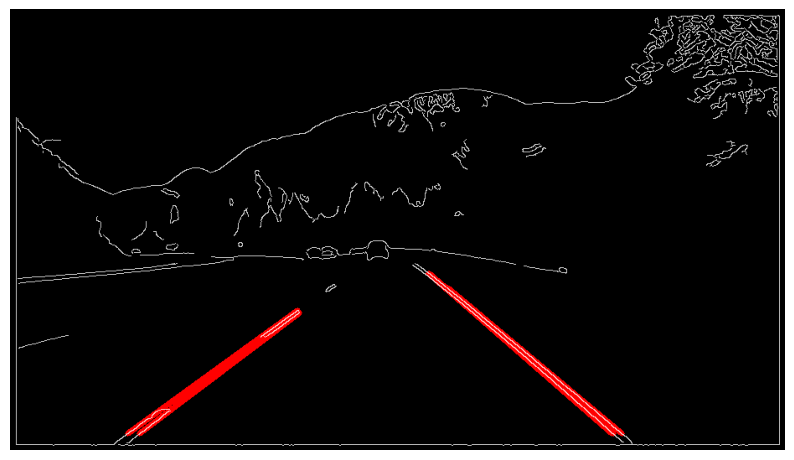

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_canny(image):
    """Convert image to grayscale, apply Gaussian Blur, and detect edges using Canny."""
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)
    return edges

def region_of_interest(edges):
    """Create a mask to focus on the road region, avoiding the bottom border."""
    height, width = edges.shape
    mask = np.zeros_like(edges)
    polygon = np.array([[
        (int(width * 0.1), height - 20),  # Avoid bottom 20 pixels
        (int(width * 0.45), int(height * 0.6)),
        (int(width * 0.55), int(height * 0.6)),
        (int(width * 0.9), height - 20)
    ]], np.int32)
    cv2.fillPoly(mask, polygon, 255)
    return cv2.bitwise_and(edges, mask)

def detect_lines(image):
    """Detect lane lines using the Hough Transform."""
    edges = apply_canny(image)
    roi_edges = region_of_interest(edges)

    # Hough Transform to detect lane segments
    lines = cv2.HoughLinesP(roi_edges, 1, np.pi / 180, 50, minLineLength=80, maxLineGap=150)
    return edges, lines

def draw_red_lines(image, edges, lines):
    """Draw lane lines in red on the edge-detected image, filtering out horizontal lines."""
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
            if abs(slope) > 0.3:  # Ignore horizontal lines
                cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)  # Red color

    # Merge edge-detected image with red lane lines
    lane_overlay = cv2.addWeighted(cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR), 0.8, line_image, 1, 0)
    return lane_overlay

# Load the image
image_path = "/content/image1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process and display the result
edges, lines = detect_lines(image)
result = draw_red_lines(image, edges, lines)

plt.figure(figsize=(10, 6))
plt.imshow(result)
plt.axis("off")
plt.show()

